In [1]:
'''C.Diya (PES1201700246) 
Namrata. R (PES1201700921) 
Semester- 3 
Section- B 
  
CODE: ''' 
#packages to be imported           
%matplotlib inline 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt; plt.rcdefaults() 
import pandas.plotting as scatter_matrix 
 
# Reading the csv file of the data set 
df = pd.read_csv(r'D:\namma\college\3 sem\IDS\Accidental_Drug_Related_Deaths__2012-2017 (1).csv') 
#df = pd.read_csv(r'C:\Users\tanus\Desktop\Accidental_Drug_Related_Deaths__2012-2017 (1).csv') 

In [2]:
#DATA CLEANING 

#Cleaning the "Others" column(removing morphine from others and adding to morphine column) 
 
for index,row in df.Other.iteritems(): 
    #print(type(row)) 
    if(type(row)== str): 
        #print(row.upper()) 
        if (row =='MORPH' or 'MORPHI' in row.upper() or row == 'MORPH/COD' or 'MORPH ' in row.upper()): 
            if('COD' in row.upper()): 
                df['Morphine (not heroin)'].loc[index]='YES' 
                df.Other.loc[index]='COD'  
            else: 
                df['Morphine (not heroin)'].loc[index]='YES' 
                df.Other.loc[index]=float('nan') 
for i in ['Other']: 
     df[i] = df[i].replace(np.nan,"NO") 

C:\Users\Ultrabook\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#Cleaning and standardizing the format of the Drug columns 
for i in ['Tramad','Heroin','Fentanyl','Cocaine','Benzodiazepine','Any Opioid','Methadone','Amphet','Morphine (not heroin)','Oxycodone','Oxymorphone','EtOH','Hydrocodone']: 
    df[i] = df[i].replace(np.nan,"NO") 
    df[i] = df[i].replace(" ","NO") 
    df[i] = df[i].replace("N","NO") 
    df[i] = df[i].replace("Y","YES") 
    df[i] = df[i].replace("y","YES") 
    df[i] = df[i].replace(" Y","YES") 
     
for i,r in df.Fentanyl.iteritems(): 
    if(type(r)==str): 
        if("Y " in r or "Y-" in r): 
            df.Fentanyl.loc[i] ="YES" 

In [7]:
#Dealing with missing values of qualitative data  
 
for i in ['Residence City','Sex','Residence County','Death State','Death City','Residence State','Death County','DescriptionofInjury','Location','InjuryPlace','ImmediateCauseA','MannerofDeath','AmendedMannerofDeath','DeathLoc']: 
    df[i] = df[i].replace(np.nan,"Data Unavailable") 
    df[i] = df[i].replace(" ","Data Unavailable") 

In [26]:
#Formatting the "Date" columns to a standard format 
df["Date"]=pd.to_datetime(df.Date) 
df['Date'] =pd.to_datetime(df['Date'].dt.date)

In [27]:
#Dealing with missing value of Age column and replacing it by the median 
a=[] 
for i,r in df['Age'].iteritems(): 
    if(r!=float('nan')): 
        a.append(r) 
for i in ['Age']: 
    df[i] = df[i].replace(np.nan,np.median(a)) 
     

C:\Users\Ultrabook\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [28]:
#Display the data frame after cleaning  
print(df)

     CaseNumber       Date     Sex             Race   Age    Residence City  \
0      13-16336 2013-11-09  Female            White  53.0            GROTON   
1      12-18447 2012-12-29    Male            White  30.0           WOLCOTT   
2       14-2758 2014-02-18    Male            White  43.0           ENFIELD   
3      14-13497 2014-09-07  Female            White  24.0       WALLINGFORD   
4      13-14421 2013-10-04  Female            White  26.0        WEST HAVEN   
5      13-18018 2013-12-10  Female            White  45.0        RIDGEFIELD   
6      13-19004 2013-12-27    Male            White  55.0        WEST HAVEN   
7       13-3783 2013-03-04    Male  Hispanic, White  47.0         NEW HAVEN   
8       14-5669 2014-04-09  Female            White  53.0           DANBURY   
9       13-9675 2013-06-28    Male            White  29.0         WATERBURY   
10     12-14640 2012-10-18    Male            White  19.0           SUDBURY   
11      14-6116 2014-04-17    Male            White 

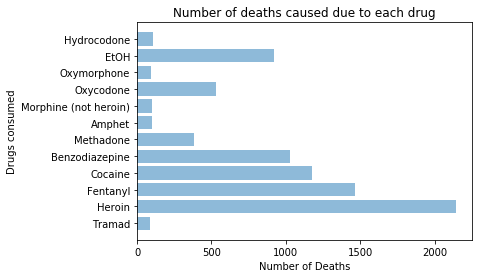

In [29]:
#GRAPHS 
#bar chart for comparative study between deaths due to each drug 
n1= df["Tramad"].str.count('YES').sum() 
n2= df["Heroin"].str.count('YES').sum() 
n3= df["Fentanyl"].str.count('YES').sum() 
n4= df["Cocaine"].str.count('YES').sum() 
n5= df["Benzodiazepine"].str.count('YES').sum() 
n6= df["Methadone"].str.count('YES').sum() 
n7= df["Amphet"].str.count('YES').sum() 
n8= df["Morphine (not heroin)"].str.count('YES').sum() 
n9= df["Oxycodone"].str.count('YES').sum() 
n10= df["Oxymorphone"].str.count('YES').sum() 
n11= df["EtOH"].str.count('YES').sum() 
n12= df["Hydrocodone"].str.count('YES').sum() 
                 
objects = ( 'Tramad','Heroin','Fentanyl','Cocaine','Benzodiazepine','Methadone','Amphet','Morphine (not heroin)','Oxycodone','Oxymorphone','EtOH','Hydrocodone') 
y_pos = np.arange(len(objects)) 
performance = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12] 
plt.barh(y_pos, performance, align='center', alpha=0.5) 
plt.yticks(y_pos, objects) 
plt.xlabel('Number of Deaths') 
plt.ylabel('Drugs consumed') 
plt.title('Number of deaths caused due to each drug') 
  
plt.show() 

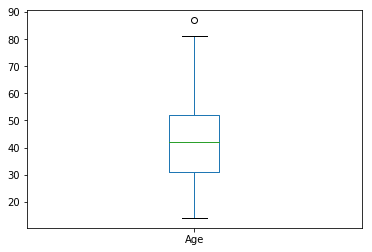

In [30]:
#Boxplot for the Age column(finding any anomoly and the median age) 
path2 = pd.DataFrame(df.Age) 
ax = path2.plot.box() 
plt.show()

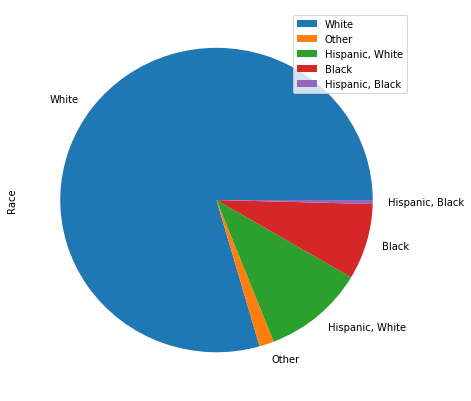

In [31]:
#Pie chart for the Race column 
t1=df["Race"].str.count('White').sum() 
t2=df["Race"].str.count('Asian').sum() 
t3=df["Race"].str.count('Black').sum() 
t4=df["Race"].str.count('Hispanic').sum() 
path3= pd.DataFrame({'Race': [3243,62,431,329,17]},index=['White','Other','Hispanic, White','Black','Hispanic, Black']) 
plot = path3.plot.pie(y='Race', figsize=(7,7)) 
plt.show() 

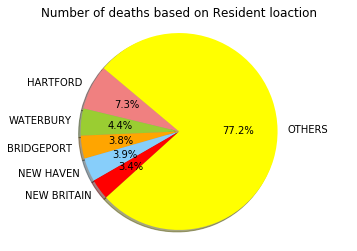

In [32]:
#Pie chart for the Resident Location 
y1=df["Residence City"].str.count("HARTFORD").sum() 
y2=df["Residence City"].str.count("WATERBURY").sum() 
y3=df["Residence City"].str.count("BRIDGEPORT").sum() 
y4=df["Residence City"].str.count("NEW HAVEN").sum() 
y5=df["Residence City"].str.count("NEW BRITAIN").sum() 
y6=4082-931 
total = [y1,y2,y3,y4,y5,y6] 
place= ['HARTFORD','WATERBURY','BRIDGEPORT','NEW HAVEN','NEW BRITAIN','OTHERS'] 
colors = ['lightcoral', 'yellowgreen', 'orange', 'lightskyblue','red','yellow'] 
explode = (0, 0, 0, 0,0,0,) 
plt.pie(total,explode=explode, labels=place, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140) 
plt.title('Number of deaths based on Resident loaction') 
plt.axis('equal') 
plt.show() 

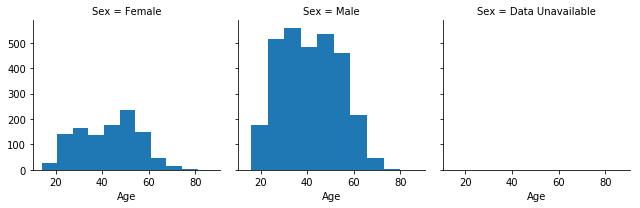

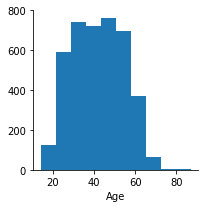

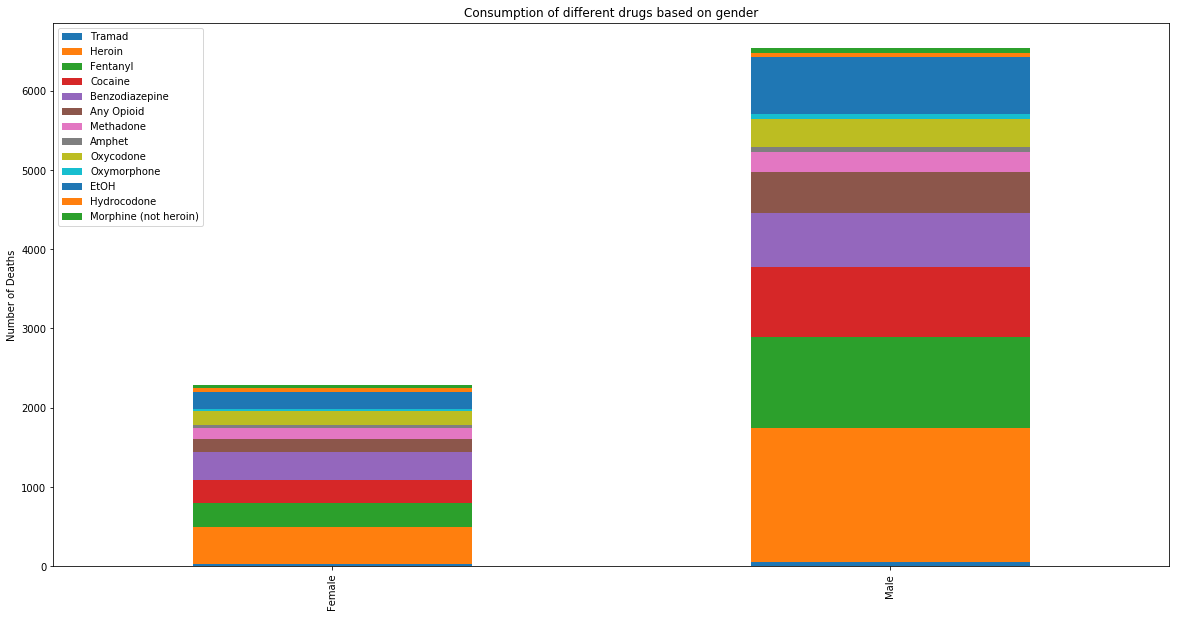

In [33]:
# Stacked bar plot of different drugs with respect to the gender 
grid = sns.FacetGrid(df, col='Sex') 
grid.map(plt.hist, 'Age') 
grid = sns.FacetGrid(df)
grid.map(plt.hist, 'Age')
df1=df[df['Sex']=='Male'] 
df2=df[df['Sex']=='Female'] 
dsex={'Male':{},'Female':{}} 
drace={} 
for i in ['Tramad','Heroin','Fentanyl','Cocaine','Benzodiazepine','Any Opioid','Methadone','Amphet','Oxycodone','Oxymorphone','EtOH','Hydrocodone','Morphine (not heroin)']: 
    dsex['Male'][i]=df1[i].str.count('YES').sum() 
    dsex['Female'][i]=df2[i].str.count('YES').sum() 
dsex1={} 

 
for i in ['Tramad','Heroin','Fentanyl','Cocaine','Benzodiazepine','Any Opioid','Methadone','Amphet','Oxycodone','Oxymorphone','EtOH','Hydrocodone','Morphine (not heroin)']: 
    d={} 
    d['Male']=dsex['Male'][i]; 
    d['Female']=dsex['Female'][i]; 
    dsex1[i]=d; 
dfsex = pd.DataFrame(dsex1) 
ax=dfsex.plot(kind="bar", stacked=True,figsize=(20,10)) 
plt.ylabel('Number of Deaths') 
plt.title('Consumption of different drugs based on gender') 
plt.show() 
 

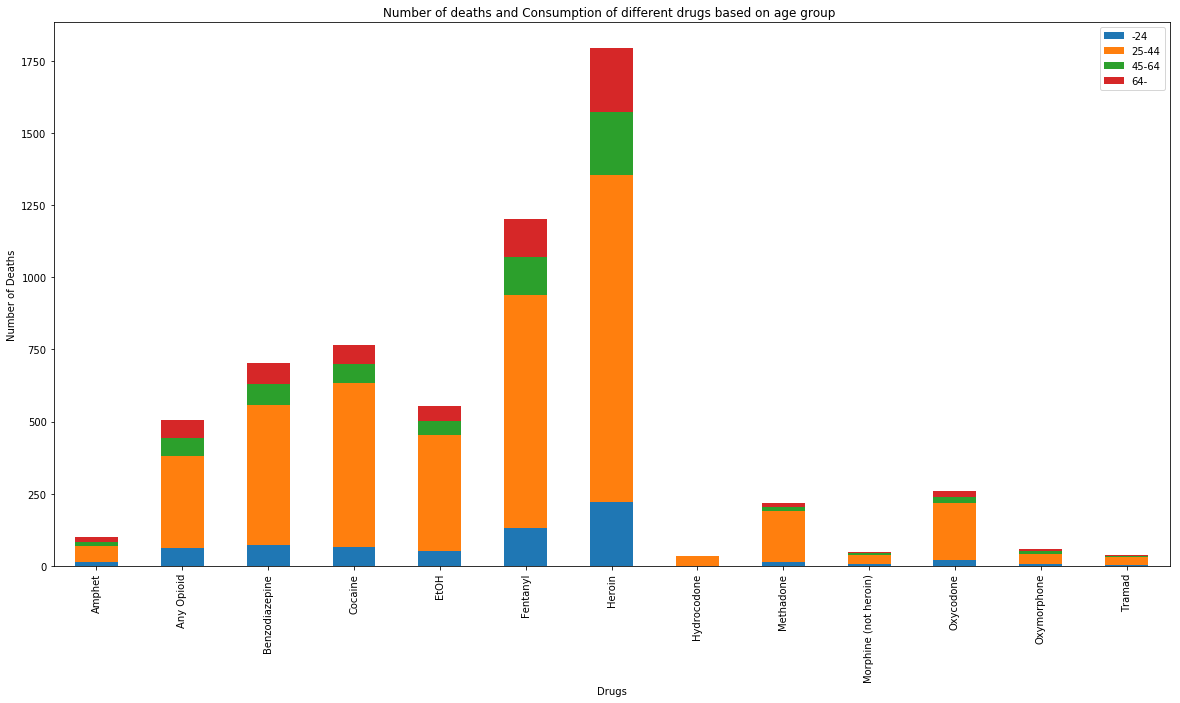

In [34]:
# Stacked graph to show number if deaths of age group for each drug 
dfage1=df[df['Age']<=24] 
dfage2=df[(df['Age']>=25) & (df['Age']<=44)] 
#dfage2 
dfage3=df[(df['Age']>=45) & (df['Age']<=64)] 
dfage4=df[(df['Age']>=65)] 
dage={'-24':{},'25-44':{},'45-64':{},'64-':{}} 
for i in ['Tramad','Heroin','Fentanyl','Cocaine','Benzodiazepine','Any Opioid','Methadone','Amphet','Oxycodone','Oxymorphone','EtOH','Hydrocodone','Morphine (not heroin)']: 
    dage['-24'][i]=dfage1[i].str.count('YES').sum() 
    dage['25-44'][i]=dfage2[i].str.count('YES').sum() 
    dage['45-64'][i]=dfage1[i].str.count('YES').sum() 
    dage['64-'][i]=dfage1[i].str.count('YES').sum() 
dfage = pd.DataFrame(dage) 
ax=dfage.plot(kind="bar", stacked=True,figsize=(20,10)) 
plt.xlabel('Drugs') 
plt.ylabel('Number of Deaths') 
plt.title('Number of deaths and Consumption of different drugs based on age group ') 

 
plt.show() 

<class 'pandas.core.series.Series'>


C:\Users\Ultrabook\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ultrabook\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


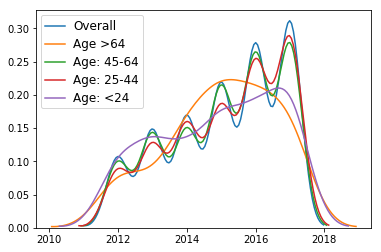

In [35]:
#Line graph to show the variation of deaths per age group over the span of 5 years 
print(type(df.Date))
fig, ax = plt.subplots()
sns.kdeplot(df['Date'].dt.year,ax=ax,label='Overall')
sns.kdeplot(dfage4.Date.dt.year,ax=ax,label='Age >64')
sns.kdeplot(dfage3.Date.dt.year,ax=ax,label='Age: 45-64')
sns.kdeplot(dfage2.Date.dt.year,ax=ax,label='Age: 25-44')
sns.kdeplot(dfage1.Date.dt.year,ax=ax,label='Age: <24')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.show()

C:\Users\Ultrabook\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


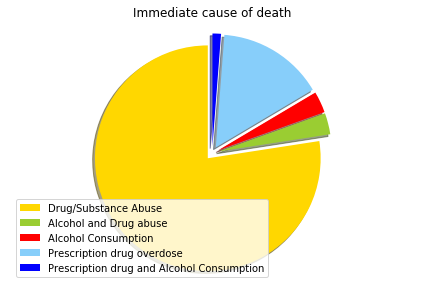

In [40]:
#Pie chart for immediate cause of death 
n1=0 
n2=0 
n3=0 
n4=0 
n5=0 
for i,r in df.DescriptionofInjury.iteritems(): 
    if(type(r)==str): 
        df.DescriptionofInjury.loc[i]=r.lower() 
        if(("drug" in r or "substance" in r) and ("medic" not in r) and ("prescrip" not in r) and ("alcohol" not in r)): 
            n1+=1 
        if(("alcohol" in r) and ("drug" not in r and "substance" not in r) and ("medic" not in r) and ("prescrip" not in r)): 
            n3+=1 
        if(("alcohol" not in r) and ("drug" not in r and "substance" not in r) and ("medic" in r or "prescrip" in r)): 
            n4+=1 
        if(("ol" in r) and ("drug" in r or "substance" in r) and (("medic" not in r) and ("prescrip" not in r))): 
            n2+=1 
        if(("alcohol" in r) and ("drug" not in r and "substance" not in r) and (("medic" in r) or ("prescrip" in r))): 
            n5+=1 
labels ='Drug/Substance Abuse','Alcohol and Drug abuse','Alcohol Consumption','Prescription drug overdose','Prescription drug and Alcohol Consumption' 
sizes = [n1,n2,n3,n4,n5] 
colors = ['gold', 'yellowgreen', 'red', 'lightskyblue','blue'] 
explode =(0.06, 0.06, 0.06, 0.06,0.06)  # explode 1st slice 
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90 ,explode = explode) 
plt.legend(patches, labels, loc="best") 
plt.axis('equal') 
plt.tight_layout() 
plt.title("Immediate cause of death") 
plt.show() 